In [17]:
%config InlineBackend.figure_format = 'retina'

Run the code cell below.

In [1]:
%load_ext google.colab.data_table

Import the numpy and pandas packages using the namespace abbreviation `np` and `pd`.

In [2]:
# Enter your solution here
import numpy as np
import pandas as pd

Import the stats module from scipy.

In [3]:
# Enter your solution here
from scipy import stats

Run the code cell below to import the `make_regression` function from the sciki-learn packages, as well as the statsmodels and the patsy packages.



In [6]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
import patsy

Run the code cell below to import the matplotlib and seaborn plotting libraries.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Run the code cell below to generate a data set simulating a study. It contains five independent (predictor) variables named `VarA`, `VarB`, `VarC`, `VarD`, and `VarE` and a single dependent (outcome) variable named `Target`. Note that all the variables as continuous numerical variable.

In [8]:
X, y = make_regression(n_samples=1000,
                       n_features=5,
                       n_informative=3,
                       random_state=28)

df = pd.DataFrame(X,
                  columns=['VarA', 'VarB', 'VarC', 'VarD', 'VarE'])

df['Target'] = y

df.head()

,VarA,VarB,VarC,VarD,VarE,Target
0,1.193100,-1.914103,1.449065,0.370291,-0.985599,76.949453
1,0.573416,-0.744686,-0.947737,2.364930,-0.350529,224.036027
2,0.166026,-0.227875,0.894470,-0.802964,0.504240,-59.874629
3,0.254730,1.711303,2.439973,0.373051,0.264450,90.635212
4,0.813129,0.182485,-0.252640,0.080478,-0.060533,72.862995


Calculate a correlation matrix between the pairs of variables and assign it to the computer variable `corr`. Hint: Use the `corr` method on the dataframe object.

In [10]:
# Enter your solution here
corr = df.corr()
corr

,VarA,VarB,VarC,VarD,VarE,Target
VarA,1.000000,-0.032456,-0.016500,-0.007139,0.073694,0.665217
VarB,-0.032456,1.000000,-0.030226,0.027718,0.003869,0.197678
VarC,-0.016500,-0.030226,1.000000,0.004426,-0.036155,-0.014048
VarD,-0.007139,0.027718,0.004426,1.000000,-0.037405,0.714689
VarE,0.073694,0.003869,-0.036155,-0.037405,1.000000,0.023943
Target,0.665217,0.197678,-0.014048,0.714689,0.023943,1.000000


Visualise the correlation data using a correlation plot. Hint: Use the seaborn `heatmap` function.

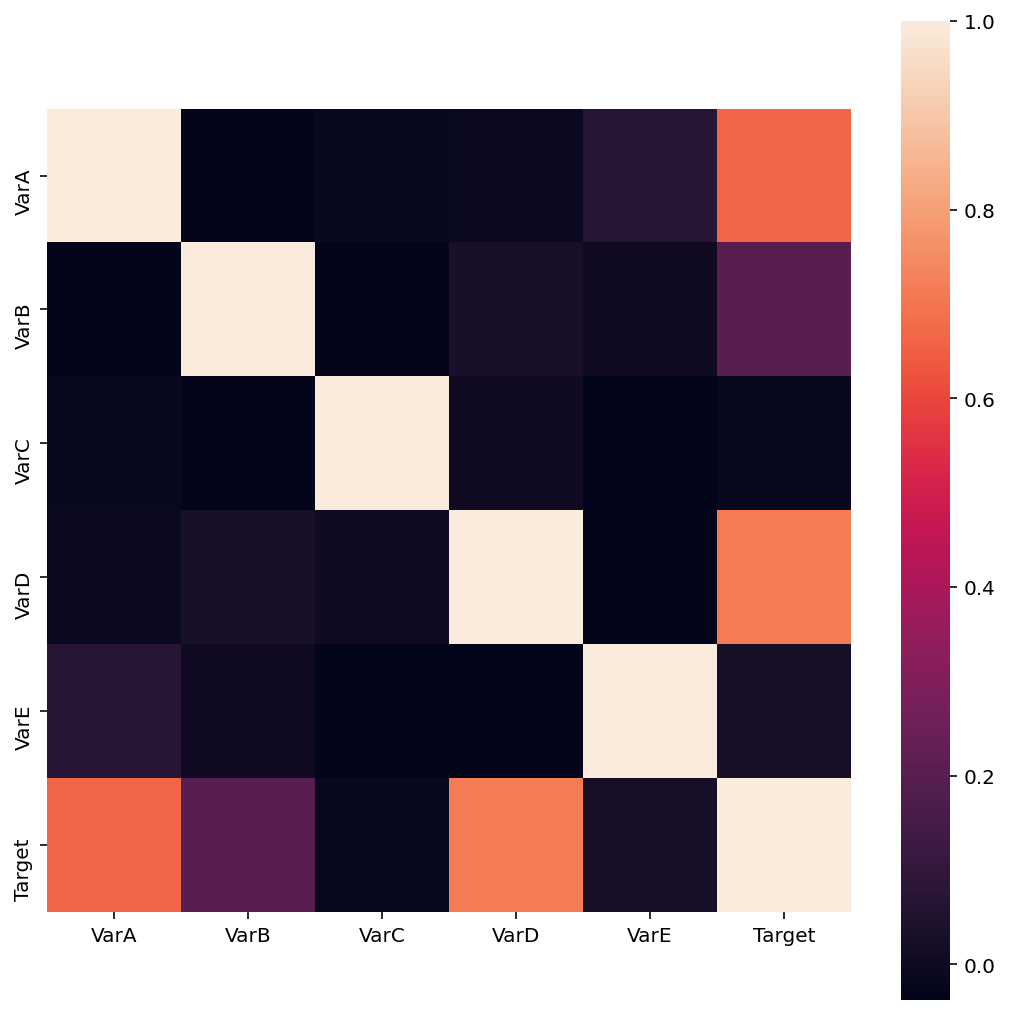

In [18]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, square=True);

`VarA` and `VarB` seem most strongly correlated to the dependent variable `Target`. Run the code cell below to show a scatter plot to visualise this correlation.

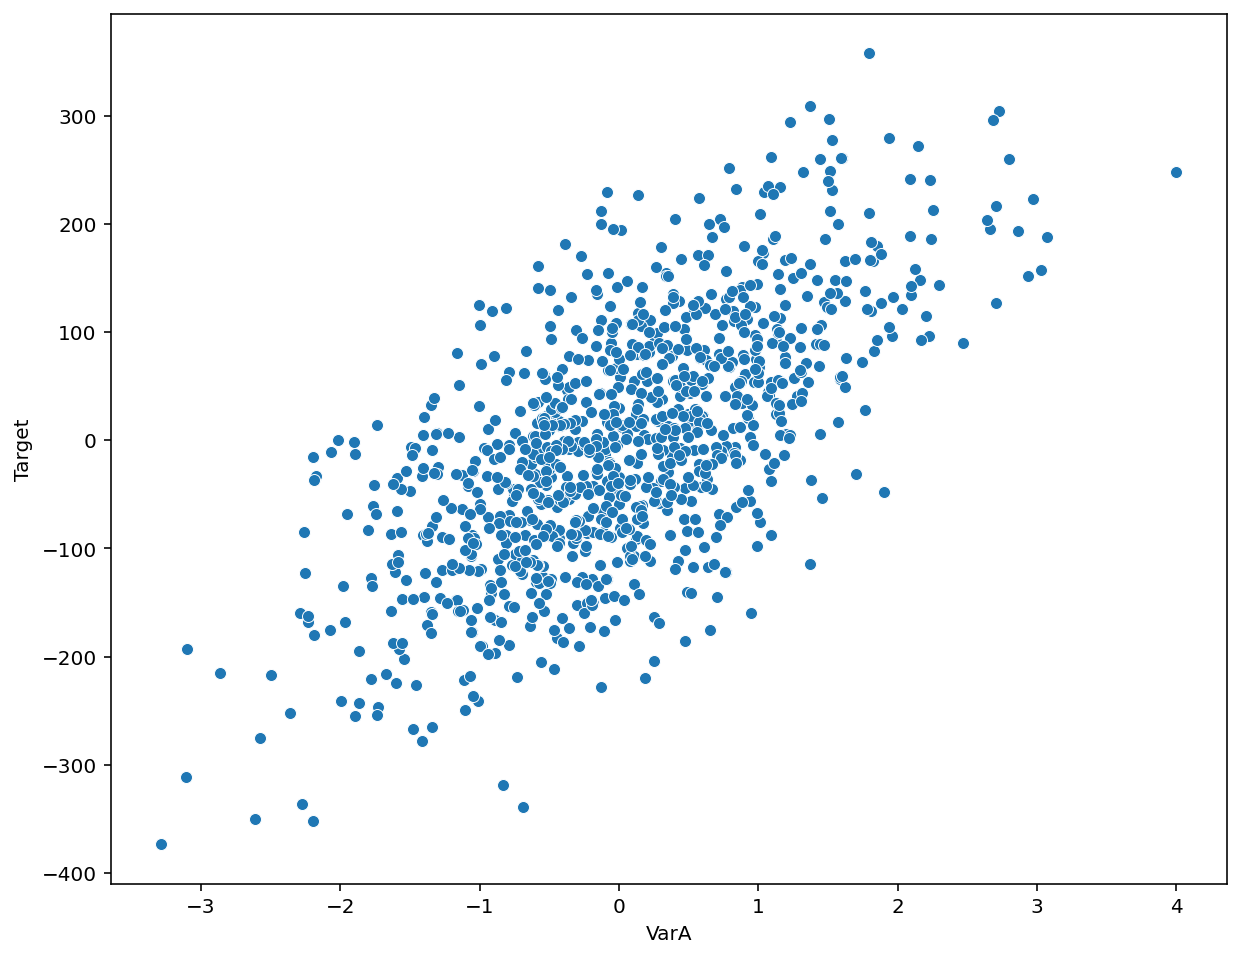

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='VarA', y='Target', data=df);

Create a simple linear regression model using `VarA` as only independent model to predict the `Target` variable. Assign the model to the computer variable `uni_model` and print a summary of the model to the screen. Hint: Use the statsmodels `OLS` function. `VarA` is the first column in the `X` array. Use indexing for this array to extract only the first column. Remember that Python is zero-indexed.

In [26]:
# Enter your solution here
uni_model = sm.OLS(X[:, 0], y).fit()
uni_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.039
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              40.04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                    3.74e-10
Time:                        13:18:58   Log-Likelihood:                         -1370.8
No. Observations:                1000   AIC:                                      2744.
Df Residuals:                     999   BIC:                                      2748.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0017      0.000      6.328      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.633
Skew:                          -0.043   Prob(JB):                        0.729
Kurtosis:                       2.912   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Read https://www.statsmodels.org/devel/example_formulas.html and see if you can use fomular notation for the same linear model.

In [32]:
# Enter your solution here
import statsmodels.formula.api as smf

fm = smf.ols(formula='Target ~ VarA', data=df)
uni_model = fm.fit()
uni_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     792.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          8.91e-129
Time:                        13:28:56   Log-Likelihood:                -5860.2
No. Observations:                1000   AIC:                         1.172e+04
Df Residuals:                     998   BIC:                         1.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5629      2.688     -1.698      0.090      -9.837       0.711
VarA          74.7744      2.657     28.146      0.000      69.561      79.988
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.631
Skew:                           0.053   Prob(JB):                        0.729
Kurtosis:                       2.936   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a multivariable linear model using `VarA` and `VarB` as independent variables. Assign the model to the computer variable `multi_model` and print a summary of the model to the screen.

In [33]:
# Enter your solution here
multi_model = smf.ols('Target ~ VarA + VarB', data=df).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     480.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          8.93e-147
Time:                        13:29:23   Log-Likelihood:                -5815.1
No. Observations:                1000   AIC:                         1.164e+04
Df Residuals:                     997   BIC:                         1.165e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7374      2.573     -2.230      0.026     -10.787      -0.688
VarA          75.5752      2.542     29.730      0.000      70.587      80.564
VarB          25.7027      2.648      9.706      0.000      20.506      30.899
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.047
Skew:                           0.003   Prob(JB):                        0.977
Kurtosis:                       2.967   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""